In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = web.DataReader('TATAMOTORS.BO', data_source='yahoo',start='2012-01-01', end='2022-02-16')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,183.041458,176.758682,180.073212,181.854156,1901735.0,176.598022
2012-01-03,192.539825,184.080338,184.080338,191.847229,2470250.0,186.302277
2012-01-04,199.861481,191.055710,191.055710,198.327896,3652703.0,192.595612
2012-01-05,203.423370,198.031067,198.674179,199.416245,2986223.0,193.652512
2012-01-06,202.483429,196.250122,197.387955,200.999313,2177172.0,195.189835
...,...,...,...,...,...,...
2022-02-10,510.000000,504.200012,507.000000,507.299988,1170471.0,507.299988
2022-02-11,506.799988,497.000000,502.049988,498.350006,501704.0,498.350006
2022-02-14,489.899994,469.000000,489.899994,471.700012,1077169.0,471.700012


In [3]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1998

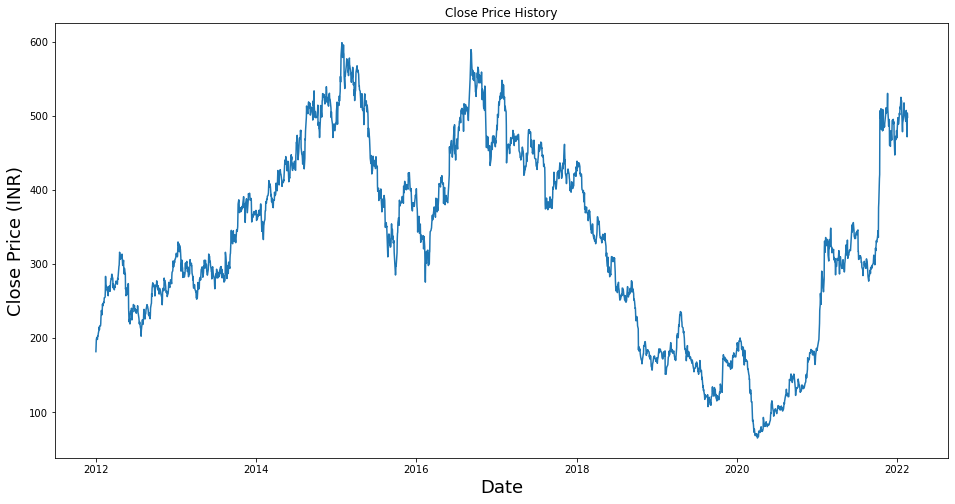

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.2185142 ],
       [0.23724908],
       [0.24939895],
       ...,
       [0.7619134 ],
       [0.82218778],
       [0.81159525]])

In [6]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.2185142 , 0.23724908, 0.24939895, 0.25143937, 0.25440728,
       0.24939895, 0.25774618, 0.25718968, 0.26015757, 0.26488768,
       0.2734204 , 0.28065467, 0.27416238, 0.28297332, 0.28362256,
       0.28362256, 0.28946562, 0.3050471 , 0.32257628, 0.31181763,
       0.32943955, 0.3386215 , 0.33407691, 0.33750855, 0.34325884,
       0.34177491, 0.34260963, 0.35457399, 0.35448124, 0.35661441,
       0.37451456, 0.40883092, 0.38935409, 0.38564422, 0.38063589,
       0.37423633, 0.3755348 , 0.3698772 , 0.35995333, 0.38332551,
       0.37989388, 0.37405085, 0.37367987, 0.38480947, 0.37099019,
       0.37470005, 0.39547541, 0.40345161, 0.40233868, 0.41383926,
       0.41439578, 0.40938744, 0.40354435, 0.38137784, 0.3900033 ,
       0.3788737 , 0.38388203, 0.37488554, 0.38323277, 0.38072863])]
[0.3820271001333171]



In [7]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1938, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1938/1938 [==============================] - 33s 16ms/step - loss: 0.0019


In [12]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
x_test = np.array(x_test)

In [14]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.225469264334333

C:\Users\kapoo\AppData\Local\Temp/ipykernel_11620/2133332622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


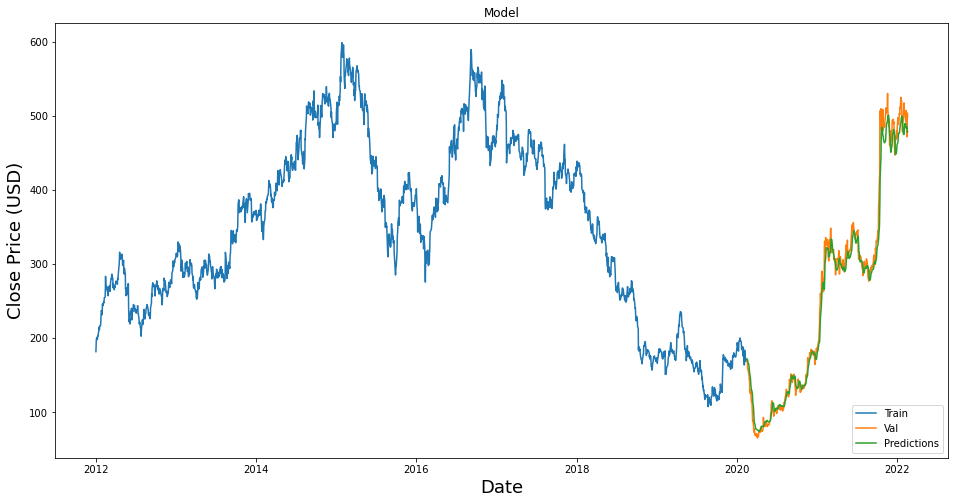

In [17]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [18]:
valid

,Close,Predictions
Date,,
2020-02-14,169.100006,172.273666
2020-02-17,169.100006,171.562851
2020-02-18,161.600006,171.009857
2020-02-19,158.050003,169.399185
2020-02-20,158.449997,166.949768
...,...,...
2022-02-10,507.299988,483.287384
2022-02-11,498.350006,484.665070
2022-02-14,471.700012,484.849426


In [19]:
ttm_quote = web.DataReader('TATAMOTORS.BO', data_source='yahoo',start='2012-01-01', end='2022-02-16')
new_df = ttm_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[479.0718]]


In [21]:
ttm_quote2 = web.DataReader('TATAMOTORS.BO', data_source='yahoo',start='2022-02-10', end='2022-02-16')
print(ttm_quote2['Close'])

Date
2022-02-10    507.299988
2022-02-11    498.350006
2022-02-14    471.700012
2022-02-15    503.850006
2022-02-16    498.200012
Name: Close, dtype: float64
